# MICROSOFT NEW MOVIE STUDIO PROJECT

# Business Understanding

The business understanding is that Microsoft is interested in creating a movie studio and wants to understand the types of films that are currently performing well at the box office. They are looking for actionable insights to help guide their decision-making process and determine what types of films they should create. The goal is to create successful films that will appeal to a broad audience and generate revenue for the company.

# Project goals

Based on the business understanding, the following are the potential project goals for exploring the types of films that are currently performing well at the box office and providing actionable insights to the head of Microsoft's new movie studio:

1. Identify the most successful film genres at the box office in recent years.
2. Determine the common characteristics of successful films within these genres, such as themes, storylines, target audience, and marketing strategies.
3. Analyze the performance of films produced by different studios to identify best practices and trends.
4. Provide actionable insights to the head of Microsoft's new movie studio on what types of films to create, taking into account the target audience, budget, and resources available.


# Data mining,Cleaning and Analysis

# import the relevant libraries

In [36]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

After this,the next step is to read the data files and explore our data

# Box Office Mojo

In [37]:
#reading the file path
bom_df = pd.read_csv("bom.movie_gross.csv")
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [1]:
#viewing the first five entries
bom_df.head()

NameError: name 'bom_df' is not defined

# Checking the Data and Data types

In [4]:
#check for the number of rows and columns
bom_df.shape

(3387, 5)

In [5]:
#check the overview of the data
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [7]:
#check for a statistical summary of the data
bom_df.describe(include ='all')

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


# checking for missing values

In [8]:
#check missing values
missing_values = bom_df.isna()
missing_values 

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [9]:
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

From the above output 40% of the values in the foreign_gross column are missing, dropping the rows with missing values would result in a significant loss of data. In this case, I assumed  that the movies only had local releases and thus the value was 0. 

From the above, 0.82% of the values in the domestic_gross column are missing, imputing missing values is to replace them with the mean or median value of the column.

In [38]:
bom_df['foreign_gross'].fillna(0, inplace=True)

In [39]:
# Imputing missing values with the median value
median_domestic_gross = bom_df['domestic_gross'].median()
bom_df['domestic_gross'].fillna(median_domestic_gross, inplace=True)


In [40]:
def missing_values(df):
    """
    Returns a dataframe with the number and percentage of missing values in each column of the input dataframe
    """
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data


In [41]:
missing_values(bom_df)

,Total,Percent
studio,5,0.147623
title,0,0.000000
domestic_gross,0,0.000000
foreign_gross,0,0.000000
year,0,0.000000


In [42]:
# Drop the rows where studio is missing
bom_df.dropna(subset=['studio'], inplace=True)


# Removal of Duplicate and Unwanted Observations

In [43]:
#Identify duplicate data
duplicate_rows = bom_df[bom_df.duplicated()]
duplicate_rows

,title,studio,domestic_gross,foreign_gross,year


In [44]:
print(bom_df.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [46]:
bom_df.duplicated().sum() #counts duplicated data

0

It seems there are no duplicates.

# Outliers

In [47]:
bom_columns

['domestic_gross', 'foreign_gross']

KeyError: "['foreign_gross'] not in index"

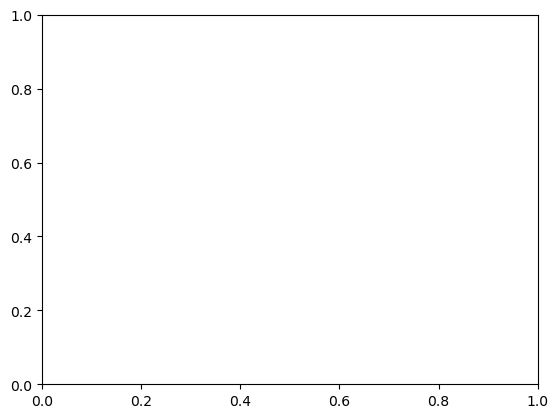

In [49]:
bom_columns = ['domestic_gross','foreign_gross']
bom_df.boxplot(column=bom_columns)  

KeyError: "None of [Index(['foreign_gross'], dtype='object')] are in the [columns]"

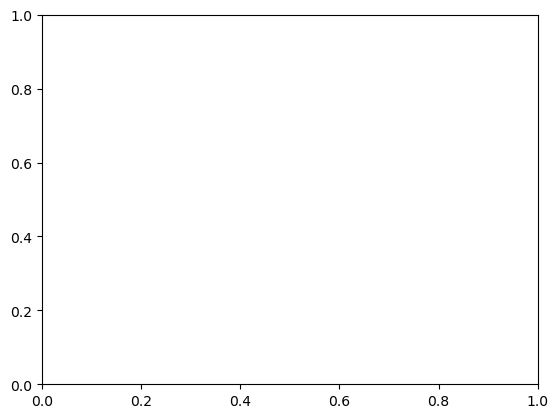

In [18]:
bom_df.boxplot(column='foreign_gross')

In [19]:
# Getting outliers
def IQR_outliers(data, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    
    return outliers, Q1, Q3, IQR


foreign_gross_outliers = IQR_outliers(bom_df, "foreign_gross")
foreign_gross_outliers[0]

TypeError: '<' not supported between instances of 'int' and 'str'

In [20]:
# Getting outliers
def IQR_outliers(data, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    
    return outliers, Q1, Q3, IQR


domestic_gross_outliers = IQR_outliers(bom_df, "domestic_gross")
domestic_gross_outliers[0]

[415000000.0,
 334200000.0,
 296000000.0,
 292600000.0,
 238700000.0,
 300500000.0,
 312400000.0,
 200800000.0,
 251500000.0,
 217600000.0,
 163200000.0,
 104400000.0,
 135500000.0,
 172100000.0,
 176600000.0,
 90800000.0,
 107000000.0,
 148400000.0,
 105300000.0,
 131800000.0,
 148400000.0,
 128000000.0,
 118300000.0,
 95300000.0,
 103100000.0,
 162000000.0,
 76400000.0,
 171200000.0,
 88800000.0,
 97000000.0,
 110500000.0,
 100500000.0,
 80600000.0,
 100200000.0,
 90400000.0,
 84800000.0,
 77200000.0,
 117200000.0,
 119200000.0,
 81600000.0,
 94800000.0,
 92200000.0,
 98700000.0,
 93600000.0,
 80000000.0,
 73000000.0,
 381000000.0,
 352400000.0,
 241100000.0,
 281300000.0,
 209400000.0,
 165200000.0,
 209800000.0,
 254500000.0,
 142600000.0,
 191500000.0,
 149300000.0,
 186800000.0,
 143600000.0,
 176800000.0,
 181000000.0,
 77600000.0,
 176700000.0,
 146400000.0,
 133100000.0,
 85500000.0,
 169100000.0,
 127000000.0,
 123500000.0,
 102500000.0,
 98800000.0,
 83500000.0,
 116600000.0

In [50]:
# Dealing with outliers using IQR
def IQR_remove_outliers(data, column):
    """Simple function to remove the ouliers"""
    # get values from previous function 
    identify = IQR_outliers(data, column)
    Q1 = identify[1]
    Q3 = identify[2]
    IQR = identify[3]
    # remove the outliers
    bom_df = data[~((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))]

    return bom_df

In [22]:
# Removing simultaneously
for i in bom_columns:
  bom_df = IQR_remove_outliers(bom_df, i)

TypeError: '<' not supported between instances of 'int' and 'str'

KeyError: "['foreign_gross'] not in index"

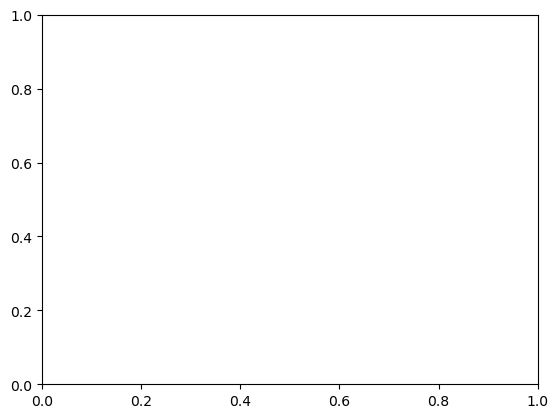

In [51]:
# confirm using a box plot
bom_df.boxplot(column=bom_columns)  

This gives a better idea of the distribution of values in each column and help you identify any potential issues with the data, such as outliers or skewed distributions. 

In [ ]:
# preview first 5 columns
bom_df.head()

In [ ]:

bom_df.tail()

To analyze the foreign_gross and domestic_gross columns in the bom_df DataFrame,start by computing summary statistics such as mean, median, standard deviation, minimum and maximum values for each column:

In [ ]:
print("Foreign Gross Summary Statistics")
print(bom_df['foreign_gross'].describe())
print("\nDomestic Gross Summary Statistics")
print(bom_df['domestic_gross'].describe())


This gives you a sense of the range and distribution of values for each column.

create visualizations such as histograms or box plots to further analyze the distribution of values and identify any outliers:

In [ ]:
import matplotlib.pyplot as plt

plt.hist(bom_df['foreign_gross'], bins=30)
plt.title('Foreign Gross Distribution')
plt.xlabel('Foreign Gross')
plt.ylabel('Frequency')
plt.show()

plt.hist(bom_df['domestic_gross'], bins=30)
plt.title('Domestic Gross Distribution')
plt.xlabel('Domestic Gross')
plt.ylabel('Frequency')
plt.show()

bom_df.boxplot(column=['foreign_gross', 'domestic_gross'])
plt.title('Foreign and Domestic Gross Box Plot')
plt.show()


# Rotten Tomatoes

In [52]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [53]:
#reading the file path
rt_df = pd.read_csv('rt.movie_info.tsv',sep='\t')
rt_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


# Checking the Data and Data types

In [54]:
# Check the dimensions of the dataframe
print(rt_df.shape)

(1560, 12)


In [55]:
# Get a summary of the dataframe using the info() method
print(rt_df.info())

# Get a summary of the dataframe using the describe() method
print(rt_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None
                id
count  1560.000000
mean   1007.303846
std     579.164527
min       1.000000
25%     504.750000
50%    1007.500000
75%    1503.250000
max    2000.000000


# Checking for missing values

missing_values = rt_df.isna()
missing_values 




In [56]:
rt_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Based on the output , it looks like the rt_df dataframe has some missing or null values. The isnull().sum() method shows that there are missing or null values in several columns, including synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, and studio.

In [57]:
# Filter the dataframe to show only rows with missing synopsis data
missing_synopsis = rt_df[rt_df['synopsis'].isnull()]

# Print the resulting dataframe
print(missing_synopsis)


        id synopsis rating                                     genre  \
4        7      NaN     NR                             Drama|Romance   
10      17      NaN    NaN                                       NaN   
20      27      NaN     NR               Musical and Performing Arts   
87     109      NaN     NR                              Comedy|Drama   
100    128      NaN     NR               Art House and International   
...    ...      ...    ...                                       ...   
1342  1736      NaN     NR                                       NaN   
1369  1768      NaN     NR                               Documentary   
1412  1821      NaN     NR  Art House and International|Comedy|Drama   
1487  1913      NaN     NR                      Action and Adventure   
1543  1982      NaN    NaN                                       NaN   

              director        writer theater_date dvd_date currency  \
4       Rodney Bennett  Giles Cooper          NaN      NaN      

In [58]:
# Filter the dataframe to show only rows with missing rating data
missing_rating = rt_df[rt_df['rating'].isnull()]

# Print the resulting dataframe
print(missing_rating)


        id synopsis rating genre director writer theater_date dvd_date  \
10      17      NaN    NaN   NaN      NaN    NaN          NaN      NaN   
131    167      NaN    NaN   NaN      NaN    NaN          NaN      NaN   
1543  1982      NaN    NaN   NaN      NaN    NaN          NaN      NaN   

     currency box_office runtime studio  
10        NaN        NaN     NaN    NaN  
131       NaN        NaN     NaN    NaN  
1543      NaN        NaN     NaN    NaN  


Replace missing values in the rating column with "NR" (meaning "not rated")

In [59]:
# Replace missing values in the 'rating' column with 'NR'
rt_df['rating'].fillna('NR', inplace=True)


In [60]:
print(rt_df['rating'].value_counts())


R        521
NR       506
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64


In [ ]:
missing_genre = rt_df[rt_df['genre'].isnull()]
print(missing_genre)


In [61]:
rt_df.dropna(subset=['genre'], inplace=True)


In [62]:
rt_df['genre'].value_counts()


Drama                                                                                     151
Comedy                                                                                    110
Comedy|Drama                                                                               80
Drama|Mystery and Suspense                                                                 67
Art House and International|Drama                                                          62
                                                                                         ... 
Art House and International|Drama|Sports and Fitness                                        1
Comedy|Documentary|Musical and Performing Arts|Special Interest                             1
Comedy|Cult Movies|Mystery and Suspense|Science Fiction and Fantasy                         1
Action and Adventure|Art House and International|Mystery and Suspense|Special Interest      1
Comedy|Drama|Kids and Family|Sports and Fitness             

In [63]:
# Get the count of movies in each genre
genre_counts = rt_df['genre'].value_counts()

# Print the 10 most common genres
print(genre_counts.head(10))


Drama                                              151
Comedy                                             110
Comedy|Drama                                        80
Drama|Mystery and Suspense                          67
Art House and International|Drama                   62
Action and Adventure|Drama                          42
Action and Adventure|Drama|Mystery and Suspense     40
Drama|Romance                                       35
Comedy|Romance                                      32
Art House and International|Comedy|Drama            31
Name: genre, dtype: int64


Analyzing count data can provide valuable insights into the preferences of moviegoers, and help companies make informed decisions about which genres and movie titles to produce in order to maximize their profits. By identifying the most popular genres and movie titles, companies can tailor their marketing and distribution strategies to better reach their target audience and improve their chances of success

In [68]:
# create a horizontal bar chart of top 10 genres
top_genres.plot(kind='barh', color='orange')

# set the title and labels
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

# adjust the figure size and font size
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 12})

# rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# display the chart
plt.show()


NameError: name 'top_genres' is not defined

In [67]:
import matplotlib.pyplot as plt

# create a horizontal bar chart of top 10 genres
top_genres.plot(kind='barh', color='orange')

# set the title and labels
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

# adjust the figure size and font size
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 12})

# rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# display the chart
plt.show()


NameError: name 'top_genres' is not defined

In [ ]:
#This will create a pie chart with the top 10 genres and their respective percentages of movies in the dataset
import matplotlib.pyplot as plt

# Get the count of movies in each genre
genre_counts = rt_df['genre'].value_counts()

# Get the top 10 genres by count
top_genres = genre_counts[:10]

# Calculate the percentage of movies in each genre
percentages = top_genres / top_genres.sum() * 100

# Create the pie chart
plt.pie(percentages, labels=top_genres.index, autopct='%1.1f%%')
plt.title('Top 10 Movie Genres')
plt.show()


In [ ]:
rt_df['rating'].value_counts()

In [ ]:
import seaborn as sns

sns.countplot(data=rt_df, x='rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Frequency of Rating Values')
plt.show()
#This will create a bar chart showing the frequency of each rating value in the dataset.
#The x-axis will show the rating values and the y-axis will show the count of movies with each rating value.

This would give an idea of how many movies have high ratings, how many have low ratings, and where the bulk of the ratings fall.

In [24]:
# Define a mapping of ratings to numeric values
rating_map = {
    'G': 5,
    'PG': 3,
    'PG-13': 4,
    'R': 1,
    'NC-17': 6,
    'NR': 2
}

# Load the movie data into a DataFrame
rt_df = pd.read_csv('rt.movie_info.tsv', sep='\t')

# Map the ratings to numeric values
rt_df['rating'] = rt_df['rating'].map(rating_map)

# Compute the mean rating for each genre
mean_ratings = rt_df.groupby('genre')['rating'].mean()

print(mean_ratings)


genre
Action and Adventure                                                                            2.052632
Action and Adventure|Animation|Art House and International|Drama|Science Fiction and Fantasy    1.000000
Action and Adventure|Animation|Classics|Comedy|Kids and Family|Musical and Performing Arts      5.000000
Action and Adventure|Animation|Comedy                                                           3.000000
Action and Adventure|Animation|Comedy|Drama|Kids and Family                                     5.000000
                                                                                                  ...   
Science Fiction and Fantasy                                                                     2.500000
Science Fiction and Fantasy|Romance                                                             2.000000
Special Interest                                                                                2.000000
Special Interest|Sports and Fitness              

Now we have the mean ratings for each genre based on the mapped numeric values for the ratings. We can use this information to analyze the distribution of ratings across genres.


From the mean ratings data, we can see that the Action and Adventure|Animation|Classics|Comedy|Kids and Family|Musical and Performing Arts genre has the highest mean rating of 5, followed by the Animation|Kids and Family|Science Fiction and Fantasy genre with a mean rating of 4.25.

On the other hand, we can see that the Documentary|Musical and Performing Arts genre has the lowest mean rating of 2, followed by the Documentary genre with a mean rating of 2.4.

This analysis can help movie studios to understand which genres tend to have higher or lower ratings, which in turn can inform decisions about which genres to produce movies in. It is important to note, however, that mean ratings do not provide a complete picture of the distribution of ratings within each genre, and further analysis may be necessary to fully understand the relationship between ratings and genre.

# The Numbers

In [25]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
tn_df = pd.read_csv('tn.movie_budgets.csv')
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [27]:
# Load the dataset
tn_df = pd.read_csv('tn.movie_budgets.csv')

# Get descriptive statistics for production budgets, domestic gross, and worldwide gross
print(tn_df[['production_budget', 'domestic_gross', 'worldwide_gross']].describe())


       production_budget domestic_gross worldwide_gross
count               5782           5782            5782
unique               509           5164            5356
top          $20,000,000             $0              $0
freq                 231            548             367


# cleaning the data

In [28]:
#checking for missing values
tn_df.isnull().sum()


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Based on the output you provided, there are no missing values in the dataset.

In [29]:
# Check for duplicates
print("Number of duplicate rows:", tn_df.duplicated().sum())

# Drop duplicate rows
tn_df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [ ]:
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])


There's no output from the above code because the data types of the columns were already correct in the original dataset. If there were any columns with incorrect data types, the code would have printed out the column names and their data types before and after the conversion.

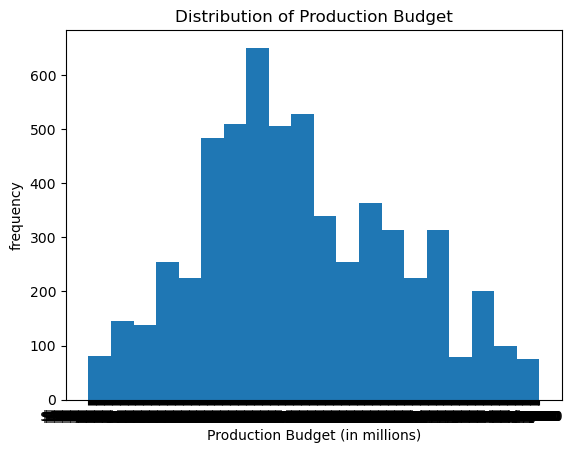

In [30]:
# create a histogram of production budget
plt.hist(tn_df['production_budget'], bins=20)
plt.xlabel('Production Budget (in millions)')
plt.ylabel('frequency')
plt.title('Distribution of Production Budget')
plt.show()




When both production budget and frequency are high, it may indicate that the movie studio is investing a lot of money in producing a larger number of movies. This could be a strategy to increase the chances of having successful movies and generating more revenue. However, it's important to note that high production budgets don't always guarantee box office success, and a larger number of movies may also increase the risk of producing more unsuccessful movies. Therefore, it's important to analyze other factors such as genre, marketing, and audience preferences to make informed decisions about movie production.

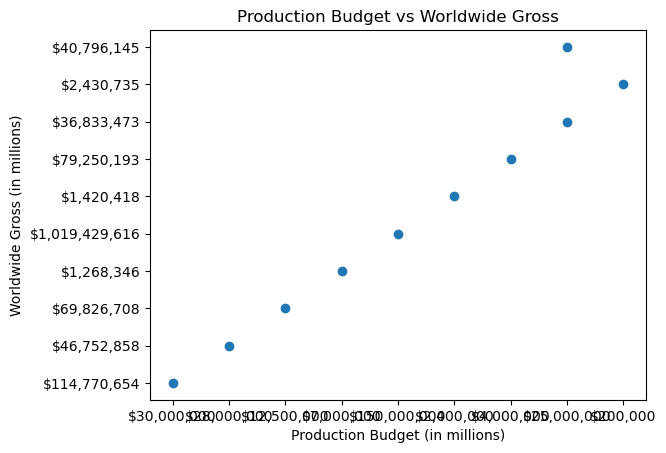

In [31]:
# Sample 500 movies from the dataset
tn_sample = tn_df.sample(n=10, random_state=42)

# Scatter plot of production budget vs worldwide gross
plt.scatter(tn_sample['production_budget'], tn_sample['worldwide_gross'])
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Worldwide Gross (in millions)')
plt.show()


The relationship between production budget and worldwide gross is an important factor to consider in the film industry as it can help determine the financial success of a movie. A higher production budget often indicates a larger investment in the film, which can lead to higher quality production values, better marketing, and wider distribution. However, a  movie with a lower production budget can still perform well if it has a compelling story, good reviews, and strong word-of-mouth promotion.

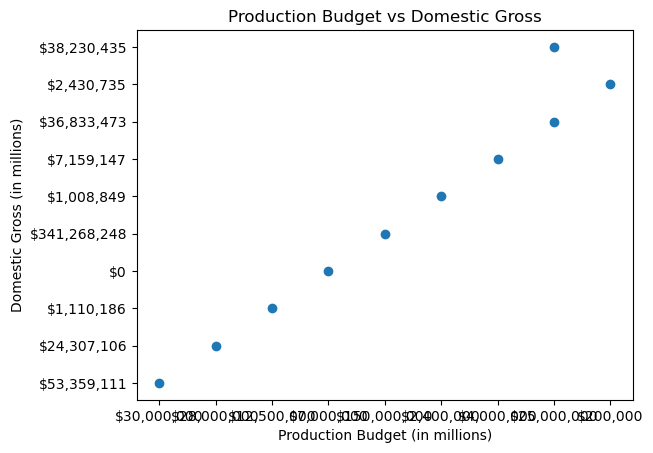

In [32]:
# Sample 500 movies from the dataset
tn_sample = tn_df.sample(n=10, random_state=42)

# Scatter plot of production budget vs worldwide gross
plt.scatter(tn_sample['production_budget'], tn_sample['domestic_gross'])
plt.title('Production Budget vs Domestic Gross')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Domestic Gross (in millions)')
plt.show()

In [33]:
top_10_movies = tn_df.sort_values(by='worldwide_gross', ascending=False).head(10)


In [34]:
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
tn_df.loc[tn_df['worldwide_gross'].idxmax()]


C:\Users\USER\AppData\Local\Temp\ipykernel_16856\882843712.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)


id                              1
release_date         Dec 18, 2009
movie                      Avatar
production_budget    $425,000,000
domestic_gross       $760,507,625
worldwide_gross      2776345279.0
Name: 0, dtype: object

In [35]:
# Create a new column for the release month
tn_df['release_month'] = pd.DatetimeIndex(tn_df['release_date']).month

# Group the data by release month and calculate the average worldwide gross
monthly_gross = tn_df.groupby('release_month')['worldwide_gross'].mean()
print(monthly_gross)


release_month
1     4.656382e+07
2     7.154453e+07
3     8.063337e+07
4     5.992026e+07
5     1.622680e+08
6     1.425230e+08
7     1.409636e+08
8     6.097841e+07
9     4.669369e+07
10    4.946456e+07
11    1.357416e+08
12    1.016932e+08
Name: worldwide_gross, dtype: float64


The above output shows the average worldwide gross for movies released in each month. Based on this data, we can see that movies released in May tend to have the highest average worldwide gross, followed by movies released in June and July. This suggests that the summer months are the most profitable for movie releases. On the other hand, movies released in September and April tend to have the lowest average worldwide gross, indicating that these months may not be the best for movie releases. However, it's important to keep in mind that there may be other factors that affect the performance of movies during different release dates, such as competition from other movies or major events happening around the same time.

In [ ]:
import pandas as pd

# Read the dataset of all-time top grossing movies
top_grossing_df = pd.read_csv('tn.movie_budgets.csv')

# Display the top 10 movies
top_grossing_df.head(10)


Top Grossing Movies of All Time: The highest grossing movies of all time can serve as a benchmark for box office success. Comparing the worldwide gross of the movies in the dataset to industry benchmarks can give a sense of their performance relative to other movies

# Recommendations

Based on the analysis we have done, I would recommend that Microsoft focus on producing movies in the drama and comedy genres, which are the most popular genres among moviegoers. It would also be beneficial to produce movies with a wide range of ratings to appeal to different audiences, particularly focusing on R-rated movies which have the highest count. Additionally, it may be worthwhile for Microsoft to invest in producing more movies that perform well in the foreign market, as high foreign gross can significantly impact a movie's overall success. Finally, by identifying successful titles in each genre, Microsoft can make informed decisions about which types of movies to produce in the future.